# Imports

In [5]:

# coding: utf-8

# # Imports

# ## Qutip imports 1

# In[1]:


from qutip.operators import sigmax, sigmay, sigmaz, identity
# position, momentum, num, create, destroy, commutator, qeye 
from qutip.tensor import tensor
from qutip.qip.gates import swap, rx, ry, rz
from qutip.qobj import Qobj
from qutip.visualization import hinton
from qutip.visualization import matrix_histogram_complex, matrix_histogram
from qutip.random_objects import rand_herm, rand_unitary, rand_dm


# ## Qutip imports 2

# In[2]:


#from 


# ## Numpy imports 

# In[2]:


from numpy import sin, cos, tan, real, imag,  log, conj
from numpy import array, append, linspace, arange
from numpy import add, sqrt, abs, dot
from numpy.random import random, random_sample, rand, seed, RandomState
from numpy import concatenate, trace, diag
from numpy import ones, zeros, ones_like, zeros_like
from numpy import amax, amin, nanmax, nanmin
from numpy import outer, multiply
# from numpy import pi


# ## Scipy imports

# In[17]:


from scipy.integrate import ode, odeint, complex_ode
from scipy.optimize import minimize
from scipy.linalg import eigh, inv, norm, expm
# from scipy.linalg import 
# from scipy import


# ## Matplotlib imports

# In[18]:


from matplotlib.pyplot import plot, figure, show, savefig, axes
from matplotlib.pyplot import xlabel, ylabel, title, legend
from matplotlib import rcParams
from matplotlib.pyplot import style 
from matplotlib.pyplot import xlim, ylim, axis 
# beware not same as axes
from matplotlib.pyplot import subplot, subplots, text
from matplotlib.pyplot import GridSpec
from matplotlib.pyplot import scatter, colorbar


pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
rcParams.update(pgf_with_rc_fonts)
style.use('seaborn-whitegrid')


# ## Math imports

# In[19]:


from math import pi
from math import exp


# ## Cmath imports

# ## Date and datetime imports

# In[20]:


from datetime import date
from datetime import datetime# now


# ## Os imports

# In[21]:


from os import getcwd, mkdir, chdir
from os.path import abspath, join 


# ## Sympy imports

# In[22]:


from sympy import Function, dsolve, Eq, Derivative, symbols
# x, y, z, t = symbols('x y z t')
# k, m, n = symbols('k m n', integer=True)
# f, g, h = symbols('f g h', cls=Function)


# ## Miscellaneous imports

# ## Extra useful functions

# In[23]:


def rint(x):
    print("x = ", x)
    return None


# # Next chapter

# ## sub topic 1

# ## sub topic 2

# ## sub topic 3

# ### sub sub topic 1



# The code

## memory wiping

In [6]:
%reset_selective -f  omega_1, total_time, epsilon, max_iter, time_steps, dt

In [7]:
%reset_selective -f  Lin, T_s, I

## Building parts

### Building the things to be calculated only once

In [8]:
def maker(omega_1, H_0, H_1, T_s, Lin, d=2, gamma=0.1):
    r"""maker
    Makes all the things that remain constant throught the program, but are 
    repeatedly used.
    

    Parameters
    ----------
    omega_1 : float
              frequency corresponding to half of the difference between 
              energy levels of the qubit
              
    H_0     : Qobj
              Bare Hamiltonian 
              
    H_1     : Qobj
              Interaction Hamiltonian 
              
    T_s     : Qobj
              Unitary to be implemented in the Hilbert space
    
    Lin     : Qobj
              Linbladian operators

    d       : int
              Dimension of the matrix. Defaults to 2
    
    gamma   : float
              Damping constantof the Linbladian

    
    Returns
    -------
    
    ih0     : Qobj
              $I\otimes H_{0}$
              
    ih1     : Qobj
              $I\otimes H_{1}$

    h0ci    : Qobj
              $H_{0}^{*}\otimes I $

    h1ci    : Qobj
              $H_{1}^{*}\otimes I $

    T       : Qobj
              Target unitary transformed to the Liouville space

    linbladian : Qobj
                 The full lindbladian term as it appears on transformation to 
                 the Liouville space.
        
    """
    I = identity(d)
    L_I = tensor(I, I)
    ih0 = tensor(I, H_0) 
    ih1 = tensor(I, H_1) 
    h0ci = tensor(H_0.conj(), I) 
    h1ci = tensor(H_1.conj(), I)
    x_k = ih1 - h1ci
    term1 = tensor(Lin.trans(), Lin)
    term2 = tensor(I, ((Lin.dag())*(Lin)))
    term3 = tensor(((Lin.trans())*(Lin.conj())), I)
    lindbladian = 1j*(gamma)*(term1 - 0.5*(term2 + term3))
    T = tensor(T_s.trans(), T_s) # Transforming $T_{s}$ to liouville space
    
    
    return ih0, ih1, h0ci, h1ci, x_k, lindbladian, T, L_I

In [9]:
omega_1 = 0.5
H_0 = sigmaz() 
H_1 = sigmay()
T_s = sigmax() 
Lin = sigmaz()
ih0, ih1, h0ci, h1ci, x_k, lindbladian, T, L_I  = maker(omega_1,
                                                  H_0, H_1, T_s, 
                                                  Lin, d=2, gamma=0.1)

In [10]:
L_I

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

### Building $A(t)$

In [11]:
def A(xi):
    r"""making $A(t)$"""
    A = ih0 - h0ci + xi*(ih1 - h1ci) #+ lindbladian
    return A

In [12]:
A(0.5)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.+0.j   0.-0.5j  0.-0.5j  0.+0.j ]
 [ 0.+0.5j -2.+0.j   0.+0.j   0.-0.5j]
 [ 0.+0.5j  0.+0.j   2.+0.j   0.-0.5j]
 [ 0.+0.j   0.+0.5j  0.+0.5j  0.+0.j ]]

### Building $L(t)$ and the Identity in the Liouville space

In [13]:
def L(xi, dt):
    r"""Making $L(t) from $A(t)$"""
    L = (-1j*A(xi)*dt).expm()
    return L

In [14]:
L(0.5, 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99999750e-01+0.00000000e+00j -4.99999583e-04-4.99999792e-07j
  -4.99999583e-04+4.99999792e-07j  2.49999896e-07+0.00000000e+00j]
 [ 4.99999583e-04+4.99999792e-07j  9.99997750e-01+1.99999833e-03j
  -2.49999896e-07+0.00000000e+00j -4.99999583e-04-4.99999792e-07j]
 [ 4.99999583e-04-4.99999792e-07j -2.49999896e-07+0.00000000e+00j
   9.99997750e-01-1.99999833e-03j -4.99999583e-04+4.99999792e-07j]
 [ 2.49999896e-07+0.00000000e+00j  4.99999583e-04+4.99999792e-07j
   4.99999583e-04-4.99999792e-07j  9.99999750e-01+0.00000000e+00j]]

## Major functions

### Major functions 1

In [15]:
# building the function to optimize (optimizee)
def L_vec(xi_vec, dt):
    r"""Building the vector of differential $L(t)$"""
    L_vec = [L(xi, dt) for xi in xi_vec] 
    return L_vec

In [16]:
def fidelity_calc(A, B):
    r"""Making a generalised fidelity function"""
    first_part = (A - B).dag()
    second_part = (A - B)
    f_int = (first_part* second_part)
    f = f_int.tr()
    return f

In [17]:
def L_full_maker(xi_vec, dt):
    r"""Building the $L(t)$ for the total time $t$"""
    xi_vec_size = xi_vec.size # finding the size of xi
    L_full = L_I # Identity for the for loop of L
    L_v = L_vec(xi_vec, dt) # calling L_vec
    for i in range(xi_vec_size): # generating L_full
        L_full = L_full*L_v[xi_vec_size - 1 - i]
    return L_full

In [18]:
def F(xi_vec, dt):
    r"""Using the fidelity metric to find out the closeness between $T$
    and $L(t)$"""
    L_full = L_full_maker(xi_vec, dt)
    F = real(-fidelity_calc(T, L_full))   
    return F

### Testing major functions 1

In [19]:
fidelity_calc(sigmax(), sigmay())

4.0

In [20]:
fidelity_calc(sigmay(), sigmay())

0.0

In [21]:
xi_vec_test = array([1.0, 2.0])
xi_vec_test

array([1., 2.])

In [22]:
xi_vec_test.size

2

In [23]:
w_vec = [xi**2 for xi in xi_vec_test]
w_vec

[1.0, 4.0]

In [24]:
# F(xi_vec, dt)
F(xi_vec_test, 0.001)

-7.999999999992001

In [25]:
L_v = L_vec(xi_vec_test, 0.001)

In [26]:
L_v

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[ 9.99999000e-01+0.00000000e+00j -9.99998667e-04-9.99999333e-07j
   -9.99998667e-04+9.99999333e-07j  9.99999333e-07+0.00000000e+00j]
  [ 9.99998667e-04+9.99999333e-07j  9.99997000e-01+1.99999733e-03j
   -9.99999333e-07+0.00000000e+00j -9.99998667e-04-9.99999333e-07j]
  [ 9.99998667e-04-9.99999333e-07j -9.99999333e-07+0.00000000e+00j
    9.99997000e-01-1.99999733e-03j -9.99998667e-04+9.99999333e-07j]
  [ 9.99999333e-07+0.00000000e+00j  9.99998667e-04+9.99999333e-07j
    9.99998667e-04-9.99999333e-07j  9.99999000e-01+0.00000000e+00j]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[ 9.99996000e-01+0.00000000e+00j -1.99999333e-03-1.99999667e-06j
   -1.99999333e-03+1.99999667e-06j  3.99999333e-06+0.00000000e+00j]
  [ 1.99999333e-03+1.99999667e-06j  9.99994000e-01+1.99999333e-03j
   -3.99999333e-06+0.00000000e+00j -1.99999333e-03-1.99999

### Major Functions 2

In [27]:
def L_comma_k_maker(xi_vec, k, dt):
    r"""Making of the derivative of full $L(t)$ at time $t_{k}$"""
    N = xi_vec.size 
    # Determining the size of xi, and thus the time_steps indirectly.
    L_v = L_vec(xi_vec, dt)# Making of the full $L(t)$
    inner_part = L_I # Beginner for the for loop
    for i in range(N):
        if i == ( N - 1 - k ):
            # The step at which $X_{k}(t)$ has to be inserted 
            inner_part = inner_part*x_k*L_v[k - 1]
        else:
            # Usual multiplications of $L_{k}$
            inner_part = inner_part*L_v[N - 1 - i]
    l_comma_k = inner_part
    return l_comma_k
    

In [28]:
# L_comma_k_maker(xi_vec, k, dt)
L_comma_k_maker(xi_vec_test, 2, 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.999910e-01+0.00000000e+00j -2.999972e-03-6.99996533e-06j
  -2.999972e-03+6.99996533e-06j  8.999962e-06+0.00000000e+00j]
 [ 2.999976e-03+4.99998067e-06j  9.999830e-01+3.99996467e-03j
  -8.999960e-06+5.99998000e-09j -2.999976e-03-4.99998067e-06j]
 [ 2.999976e-03-4.99998067e-06j -8.999960e-06-5.99998000e-09j
   9.999830e-01-3.99996467e-03j -2.999976e-03+4.99998067e-06j]
 [ 8.999962e-06+0.00000000e+00j  2.999972e-03+6.99996533e-06j
   2.999972e-03-6.99996533e-06j  9.999910e-01+0.00000000e+00j]]

In [29]:
def updater(xi_vec, dt, epsilon):
    r"""Implementing the GRAPE update step"""
    xi_vec_size = xi_vec.size # finding the size of xi
    L_full = L_full_maker(xi_vec, dt)
    di = []
    for k in range(xi_vec_size):
        # Building the thing to be added to the old function
        L_comma_k = L_comma_k_maker(xi_vec, k, dt)
        differentiated = T - L_comma_k
        plain = T - L_full
        c = -differentiated.dag()*plain
        d = -plain.dag()*differentiated
        inside = c.tr() + d.tr()
        di.append(epsilon*inside)

    diff = array(di)
    xi_new_vec = xi_vec + diff
    return diff, xi_new_vec
    

In [30]:
#  updater(xi_vec, dt, epsilon)
updater(xi_vec_test, 0.001, 0.001)

(array([-0.008+0.j, -0.008+0.j]), array([0.992+0.j, 1.992+0.j]))

In [31]:
def terminator(max_iter, time_steps, total_time, epsilon):
    r"""Brief description of the function"""
    
    xi_initial =  1000*random_sample((time_steps,))
    dt = total_time/time_steps
    xi_diff, xi_new_vec = updater(xi_initial, dt, epsilon)
    
    for i in range(max_iter):
        if amax(xi_diff) < epsilon**2 :
            xi_final = xi_new_vec
            break
        else :
            xi_diff, xi_new_vec = updater(xi_new_vec, dt, epsilon)
            print(i)
            print(amax(xi_diff))
            
        
    xi_final = xi_new_vec    
    return xi_final

In [32]:
def terminator(max_iter, time_steps, total_time, epsilon):
    r"""Brief description of the function"""
    
    xi_initial =  1000*random_sample((time_steps,))
    dt = total_time/time_steps
    xi_diff, xi_new_vec = updater(xi_initial, dt, epsilon)
    
    for i in range(max_iter):
        if amax(xi_diff) < epsilon**2 :
            xi_final = xi_new_vec
            break
        else :
            xi_diff, xi_new_vec = updater(xi_new_vec, dt, epsilon)
            print(i)
            print(amax(xi_diff))
            
        
    xi_final = xi_new_vec    
    return xi_final

# Running stuff

### Try1

In [33]:
total_time = pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [34]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([661.13828966+0.j, 820.52212975+0.j, 739.21623602+0.j,
       952.14462859+0.j, 226.28114742+0.j, 346.98384034+0.j,
       838.05739008+0.j, 545.81316983+0.j, 205.11491357+0.j,
       185.47207274+0.j,  78.08395794+0.j, 831.4225246 +0.j,
       193.19242138+0.j, 954.26294687+0.j, 389.36452106+0.j,
       842.05420004+0.j, 678.58866709+0.j, 267.73478635+0.j,
       459.8638009 +0.j, 361.91991643+0.j])

In [35]:
F(xi_opt, dt)

-7.999943888442825

In [36]:
max_iter

10

In [37]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [38]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.42537325+0.j          0.49434052-0.00763521j  0.49434052+0.00763521j
   0.57462675+0.j        ]
 [-0.49438181+0.00418087j  0.42525177-0.0101657j  -0.57461272-0.00401515j
   0.49438181-0.00418087j]
 [-0.49438181-0.00418087j -0.57461272+0.00401515j  0.42525177+0.0101657j
   0.49438181+0.00418087j]
 [ 0.57462675+0.j         -0.49434052+0.00763521j -0.49434052-0.00763521j
   0.42537325+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a13a2d5c0>)

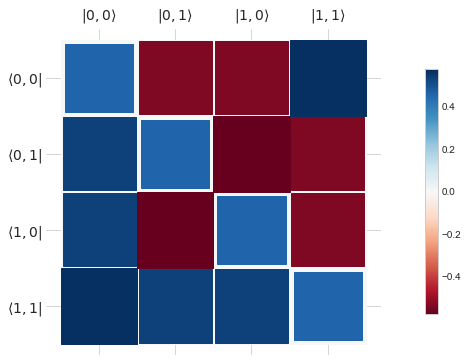

In [39]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [36]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [37]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([669.86590905+0.j, 945.07750243+0.j, 501.36629768+0.j,
       521.91951452+0.j, 446.6199184 +0.j, 325.44346231+0.j,
       838.21472723+0.j, 959.67448838+0.j, 742.72774849+0.j,
       483.25883019+0.j, 868.74390478+0.j,  90.66153356+0.j,
       676.79802054+0.j, 131.07850863+0.j, 909.94233428+0.j,
       945.77351951+0.j, 384.64294946+0.j, 397.56122242+0.j,
       130.97502559+0.j, 543.64320591+0.j])

In [38]:
F(xi_opt, dt)

-7.999878651395828

In [39]:
max_iter

10

In [40]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [41]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.63981939+0.j         -0.47997746-0.00849546j -0.47997746+0.00849546j
   0.36018061+0.j        ]
 [ 0.4800473 +0.00226523j  0.63965864+0.01434136j -0.36015027+0.0046747j
  -0.4800473 -0.00226523j]
 [ 0.4800473 -0.00226523j -0.36015027-0.0046747j   0.63965864-0.01434136j
  -0.4800473 +0.00226523j]
 [ 0.36018061+0.j          0.47997746+0.00849546j  0.47997746-0.00849546j
   0.63981939+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a197115c0>)

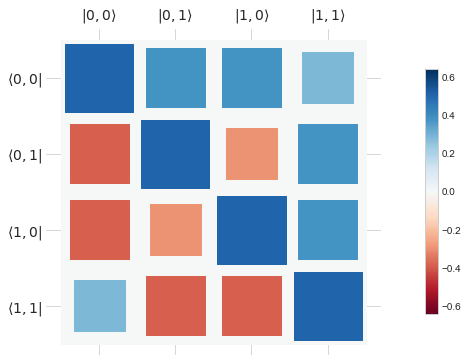

In [42]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [40]:
total_time = 4*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [41]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([509.26113739+0.j, 270.39936254+0.j, 479.35336782+0.j,
        38.39241336+0.j, 549.92114029+0.j, 434.22612501+0.j,
        88.85819715+0.j, 682.95097346+0.j, 220.42812806+0.j,
       920.06946353+0.j, 489.5151925 +0.j, 871.55004605+0.j,
       528.41576266+0.j, 140.33333007+0.j, 788.82575662+0.j,
       851.83559918+0.j, 501.24909106+0.j, 887.8124147 +0.j,
       727.27963347+0.j, 939.69894289+0.j])

In [42]:
F(xi_opt, dt)

-7.994276787798491

In [43]:
max_iter

10

In [44]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [45]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.7520235 +0.j         -0.43126501-0.02224074j -0.43126501+0.02224074j
   0.2479765 +0.j        ]
 [ 0.43116238-0.02414875j  0.75201614-0.0033275j  -0.2465457 +0.02660007j
  -0.43116238+0.02414875j]
 [ 0.43116238+0.02414875j -0.2465457 -0.02660007j  0.75201614+0.0033275j
  -0.43116238-0.02414875j]
 [ 0.2479765 +0.j          0.43126501+0.02224074j  0.43126501-0.02224074j
   0.7520235 +0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2040e4a8>)

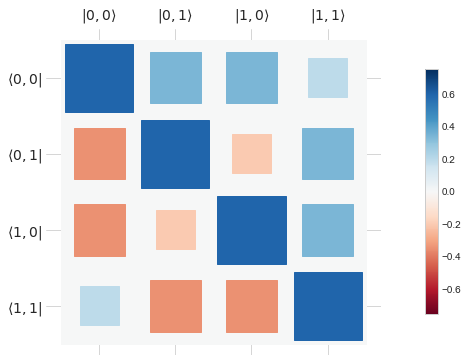

In [46]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [50]:
total_time = 5*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [51]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([466.69961721+0.j, 330.23961373+0.j, 322.89299009+0.j,
       915.09418442+0.j, 166.93516108+0.j, 514.74740965+0.j,
       205.64947124+0.j, 880.85829931+0.j, 270.54104595+0.j,
       931.23121863+0.j, 605.85581368+0.j, 778.82219083+0.j,
       649.5374667 +0.j, 246.85216722+0.j, 178.66994736+0.j,
       820.35938533+0.j, 886.20501933+0.j,  98.57964324+0.j,
       417.61133492+0.j, 961.50069866+0.j])

In [52]:
F(xi_opt, dt)

-7.999976536107417

In [53]:
max_iter

10

In [54]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [55]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.0192709 +0.j         -0.13686667+0.01292485j -0.13686667-0.01292485j
   0.9807291 +0.j        ]
 [ 0.13682115-0.01339815j  0.01891765-0.00367293j -0.98072323+0.00339202j
  -0.13682115+0.01339815j]
 [ 0.13682115+0.01339815j -0.98072323-0.00339202j  0.01891765+0.00367293j
  -0.13682115-0.01339815j]
 [ 0.9807291 +0.j          0.13686667-0.01292485j  0.13686667+0.01292485j
   0.0192709 +0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a19aa8cf8>)

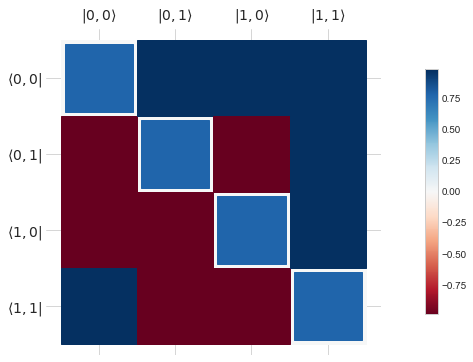

In [56]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [57]:
total_time = 10*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [58]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([801.22975268+0.j, 344.63430836+0.j, 253.21906114+0.j,
       440.84323934+0.j, 442.11750813+0.j,  63.51827501+0.j,
       678.84275573+0.j, 608.18063622+0.j,  84.70584212+0.j,
       814.90672787+0.j, 599.67793608+0.j, 675.32772266+0.j,
       766.10922766+0.j, 922.49846828+0.j, 486.1148965 +0.j,
       834.63923298+0.j, 276.53050897+0.j,  22.68475228+0.j,
       356.84094845+0.j, 303.79273286+0.j])

In [59]:
F(xi_opt, dt)

-7.992913514381064

In [60]:
max_iter

10

In [61]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [62]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.01005211+0.j         -0.09929145-0.00960585j -0.09929145+0.00960585j
   0.98994789+0.j        ]
 [ 0.09853933+0.01552627j  0.00973281+0.00251344j -0.98817627-0.05919871j
  -0.09853933-0.01552627j]
 [ 0.09853933-0.01552627j -0.98817627+0.05919871j  0.00973281-0.00251344j
  -0.09853933+0.01552627j]
 [ 0.98994789+0.j          0.09929145+0.00960585j  0.09929145-0.00960585j
   0.01005211+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a189dfcc0>)

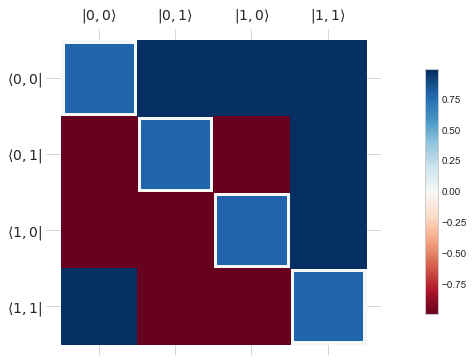

In [63]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [64]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 200
dt = total_time/time_steps

In [65]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([743.85850405+0.j, 762.46386883+0.j, 350.23291645+0.j,
       286.90761453+0.j, 977.01535902+0.j, 157.06636268+0.j,
       411.78027708+0.j, 144.41556081+0.j, 813.91277463+0.j,
       750.69478547+0.j, 862.61871307+0.j, 191.57822577+0.j,
       561.11315509+0.j, 466.42560087+0.j, 176.12766183+0.j,
       854.31927459+0.j, 751.49419248+0.j, 950.67193321+0.j,
         4.11354211+0.j, 127.35840933+0.j, 744.08850349+0.j,
        90.37254933+0.j, 846.97775156+0.j, 448.33614467+0.j,
        96.86076024+0.j,  69.78813357+0.j, 313.53280859+0.j,
       649.86654336+0.j, 444.22980827+0.j, 963.36550413+0.j,
       636.41618623+0.j, 372.67241707+0.j, 918.50804831+0.j,
       227.4421582 +0.j,  91.53093362+0.j, 541.97148361+0.j,
       973.82169562+0.j, 265.20128439+0.j, 836.484508  +0.j,
       856.65699891+0.j, 531.05648911+0.j, 595.05681936+0.j,
       228.37761616+0.j, 532.91693834+0.j, 849.62894875+0.j,
       593.06152973+0.j, 513.32025761+0.j, 654.85467931+0.j,
       213.50085036+0.j,

In [66]:
F(xi_opt, dt)

-7.810508270649688

In [67]:
max_iter

10

In [68]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [69]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.83789152+0.j         -0.29399606+0.22225129j -0.29399606-0.22225129j
   0.16210848+0.j        ]
 [ 0.36508946+0.05038855j  0.73120039-0.40915546j -0.11473555-0.11452036j
  -0.36508946-0.05038855j]
 [ 0.36508946-0.05038855j -0.11473555+0.11452036j  0.73120039+0.40915546j
  -0.36508946+0.05038855j]
 [ 0.16210848+0.j          0.29399606-0.22225129j  0.29399606+0.22225129j
   0.83789152+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x107c2d2e8>)

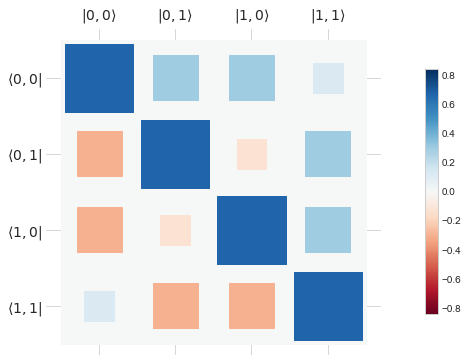

In [70]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [71]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 50
dt = total_time/time_steps

In [72]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([728.6118843 +0.j, 818.33080223+0.j, 166.39663543+0.j,
        57.01551037+0.j,   7.91568015+0.j, 151.43268169+0.j,
       478.97979492+0.j, 744.15856762+0.j, 216.73278707+0.j,
       193.77553412+0.j, 518.98548909+0.j, 354.93862054+0.j,
       970.50040178+0.j, 984.87449563+0.j, 626.28718309+0.j,
       577.80462714+0.j, 510.41346207+0.j, 693.51895907+0.j,
       672.13349401+0.j, 794.73237189+0.j, 491.33419232+0.j,
       239.08866932+0.j, 535.6803329 +0.j, 969.44583928+0.j,
        10.54635342+0.j,  12.14615005+0.j, 414.29731833+0.j,
       911.39171447+0.j, 974.8622077 +0.j, 267.89439612+0.j,
       330.57263236+0.j, 581.28618369+0.j, 771.2177956 +0.j,
       844.07917385+0.j, 492.87674993+0.j, 721.86290324+0.j,
       552.93720221+0.j, 105.61401908+0.j, 886.08622712+0.j,
       255.66969227+0.j, 674.19997653+0.j, 218.61315336+0.j,
       345.38054935+0.j, 402.76362426+0.j, 713.2057017 +0.j,
       673.12296025+0.j, 771.2028664 +0.j,  85.30405581+0.j,
       711.38333007+0.j,

In [73]:
F(xi_opt, dt)

-7.979248752953803

In [74]:
max_iter

10

In [75]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [76]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.64812173+0.j         -0.47686214-0.02573821j -0.47686214+0.02573821j
   0.35187827+0.j        ]
 [ 0.47423501-0.05622377j  0.64679134-0.0415059j  -0.34669046+0.06020003j
  -0.47423501+0.05622377j]
 [ 0.47423501+0.05622377j -0.34669046-0.06020003j  0.64679134+0.0415059j
  -0.47423501-0.05622377j]
 [ 0.35187827+0.j          0.47686214+0.02573821j  0.47686214-0.02573821j
   0.64812173+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a19861978>)

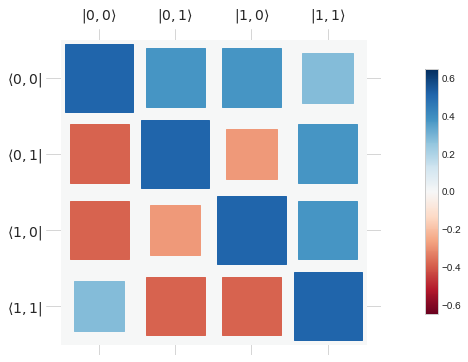

In [77]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [78]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 20#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [79]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([128.86894612+0.j, 278.48726764+0.j, 680.92047077+0.j,
       462.4770889 +0.j, 209.70176853+0.j, 631.25011205+0.j,
       319.24408188+0.j, 422.27134106+0.j, 365.73469369+0.j,
       369.59378193+0.j, 400.347261  +0.j, 878.18492599+0.j,
       970.98427226+0.j, 569.6174071 +0.j, 936.51524861+0.j,
       620.08426469+0.j, 343.73600164+0.j,  84.74012196+0.j,
       611.89130885+0.j, 755.42637418+0.j])

In [80]:
F(xi_opt, dt)

-7.999923874715472

In [81]:
max_iter

20

In [82]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [83]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.98998819+0.j         -0.09953225-0.00221414j -0.09953225+0.00221414j
   0.01001181+0.j        ]
 [ 0.09947951-0.00392416j  0.98984202-0.01701179j -0.00999278+0.00061702j
  -0.09947951+0.00392416j]
 [ 0.09947951+0.00392416j -0.00999278-0.00061702j  0.98984202+0.01701179j
  -0.09947951-0.00392416j]
 [ 0.01001181+0.j          0.09953225+0.00221414j  0.09953225-0.00221414j
   0.98998819+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a19ed2668>)

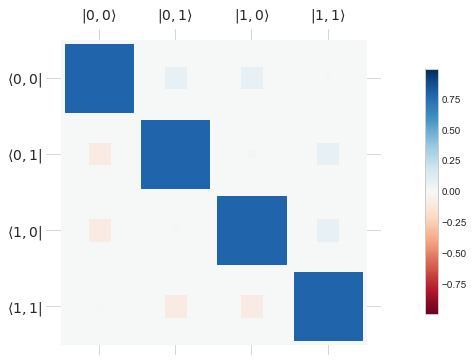

In [84]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [85]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 100#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [86]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([307.99660544+0.j, 348.24209539+0.j, 994.23208953+0.j,
       805.66129554+0.j, 752.3644325 +0.j, 572.16516822+0.j,
       725.05517925+0.j, 549.17423446+0.j, 668.8922523 +0.j,
       362.77852064+0.j, 745.8724467 +0.j, 232.27075906+0.j,
       216.52775641+0.j, 299.45764407+0.j, 171.21078491+0.j,
        87.92977019+0.j, 526.88481355+0.j, 427.86079664+0.j,
         6.73834602+0.j, 191.11706252+0.j])

In [87]:
F(xi_opt, dt)

-7.999163191221685

In [88]:
max_iter

100

In [89]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [90]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.53198451+0.j          0.4986045 -0.01924948j  0.4986045 +0.01924948j
   0.46801549+0.j        ]
 [-0.49895712+0.00433438j  0.53139017-0.02513978j -0.46780628-0.013992j
   0.49895712-0.00433438j]
 [-0.49895712-0.00433438j -0.46780628+0.013992j    0.53139017+0.02513978j
   0.49895712+0.00433438j]
 [ 0.46801549+0.j         -0.4986045 +0.01924948j -0.4986045 -0.01924948j
   0.53198451+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a19e592b0>)

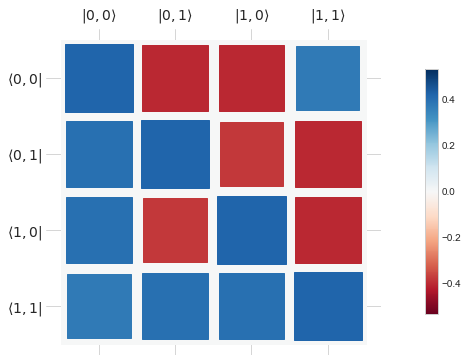

In [91]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [92]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 100#10**4#1000#100#50#20
time_steps = 200
dt = total_time/time_steps

In [93]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([753.64126704+0.j, 573.56426237+0.j, 714.6924714 +0.j,
       797.99827118+0.j, 263.59055883+0.j, 168.500403  +0.j,
       923.66196723+0.j, 323.80034874+0.j, 457.15588855+0.j,
       355.46567776+0.j, 280.75135591+0.j, 190.18944883+0.j,
       674.70879789+0.j,  54.12080037+0.j, 649.0994239 +0.j,
       866.70472666+0.j, 662.37938673+0.j, 246.16308868+0.j,
       993.51232927+0.j, 940.13460175+0.j, 386.07273227+0.j,
        54.85555633+0.j,  47.29835432+0.j, 829.72090904+0.j,
       447.07803453+0.j, 911.15123144+0.j, 908.82957801+0.j,
       135.74602088+0.j, 930.22890347+0.j, 667.29290637+0.j,
       508.10477283+0.j, 411.7111872 +0.j, 394.4909149 +0.j,
       867.32819175+0.j, 554.48017114+0.j, 926.03836676+0.j,
       754.02952039+0.j, 999.39519539+0.j, 291.55254259+0.j,
       381.61226652+0.j, 648.59349459+0.j, 167.21383925+0.j,
       422.58332462+0.j, 938.52223333+0.j, 582.40520172+0.j,
        47.19108095+0.j, 613.84537915+0.j, 224.27359316+0.j,
       879.83101161+0.j,

In [94]:
F(xi_opt, dt)

-7.997788403386666

In [95]:
max_iter

100

In [96]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [97]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.13187462+0.j          0.33063963+0.07184109j  0.33063963-0.07184109j
   0.86812538+0.j        ]
 [-0.32786545-0.08359399j  0.11795511+0.0589704j  -0.86757248-0.03097847j
   0.32786545+0.08359399j]
 [-0.32786545+0.08359399j -0.86757248+0.03097847j  0.11795511-0.0589704j
   0.32786545-0.08359399j]
 [ 0.86812538+0.j         -0.33063963-0.07184109j -0.33063963+0.07184109j
   0.13187462+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1a1127b8>)

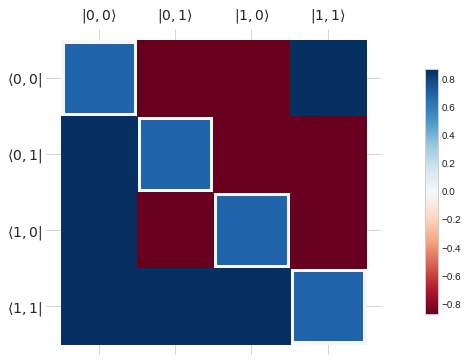

In [98]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [99]:
total_time = 3*pi/omega_1
epsilon = (0.1*2*pi)/(total_time)#10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [100]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([ 38.26210636+0.j,  21.73406572+0.j, 446.15758987+0.j,
       840.41795109+0.j, 588.95347476+0.j, 861.34830972+0.j,
        85.81080314+0.j,  70.75373449+0.j, 686.03993662+0.j,
       707.55499301+0.j, 222.21118848+0.j, 801.89232344+0.j,
       881.38241882+0.j, 227.74613146+0.j, 365.5482472 +0.j,
       998.28716414+0.j, 942.37896788+0.j, 265.76315331+0.j,
        32.64531023+0.j, 723.1201359 +0.j])

In [101]:
F(xi_opt, dt)

-7.998374060890137

In [102]:
max_iter

10

In [103]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [104]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.05255914+0.j         -0.22314959+0.00097103j -0.22314959-0.00097103j
   0.94744086+0.j        ]
 [ 0.22302541-0.00750659j  0.05252121-0.0019966j  -0.94703437+0.02775023j
  -0.22302541+0.00750659j]
 [ 0.22302541+0.00750659j -0.94703437-0.02775023j  0.05252121+0.0019966j
  -0.22302541-0.00750659j]
 [ 0.94744086+0.j          0.22314959-0.00097103j  0.22314959+0.00097103j
   0.05255914+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a19edbf28>)

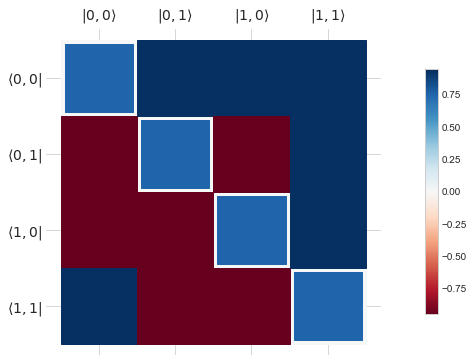

In [105]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [106]:
total_time = 3*pi/omega_1
epsilon = (0.1*2*pi)/(total_time)#10**(-6)
max_iter = 500#10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [107]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([519.56348112+0.j, 784.02530827+0.j, 986.98743817+0.j,
       961.41127746+0.j, 773.76381599+0.j, 847.66637248+0.j,
       376.41258141+0.j, 918.0130263 +0.j, 234.31701264+0.j,
       554.60878022+0.j, 542.46136329+0.j, 189.81287231+0.j,
       869.45388803+0.j, 577.83010595+0.j, 505.85101269+0.j,
       756.33516652+0.j, 688.31056622+0.j, 303.22824885+0.j,
       927.2533066 +0.j, 954.53280283+0.j])

In [108]:
F(xi_opt, dt)

-7.999915310199183

In [109]:
max_iter

500

In [110]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [111]:
myU = L_full_maker(xi_opt, dt)

In [112]:
myU/myU[0, 3]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.03298456+0.j          0.18160072-0.00239443j  0.18160072+0.00239443j
   1.        +0.j        ]
 [-0.18161259+0.00119333j  0.03297812-0.00065157j -0.99997813-0.00661371j
   0.18161259-0.00119333j]
 [-0.18161259-0.00119333j -0.99997813+0.00661371j  0.03297812+0.00065157j
   0.18161259+0.00119333j]
 [ 1.        +0.j         -0.18160072+0.00239443j -0.18160072-0.00239443j
   0.03298456+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1a6c3f60>)

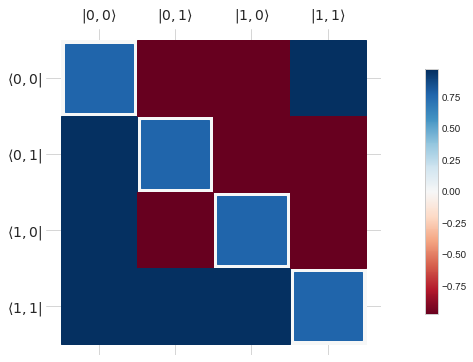

In [113]:
hinton(myU)

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1a67af98>)

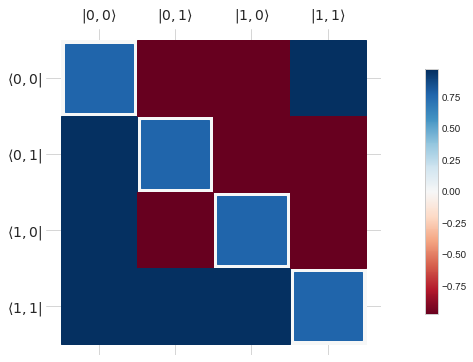

In [114]:
hinton(L_full_maker(xi_opt, dt))

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1a9217b8>)

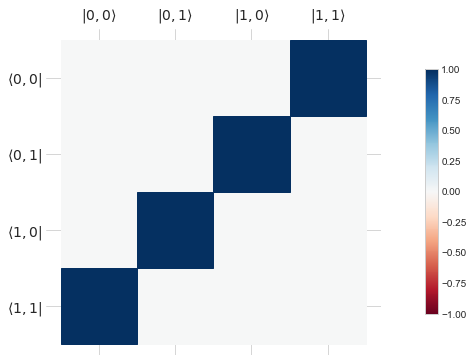

In [115]:
hinton(T)